In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load data
df = pd.read_csv("airline_passenger_satisfaction.csv")
df

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129875,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,129876,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,129877,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,129878,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [ ]:
# 原始資料集欄位說明 (請看 README.md)
DataDictionary = pd.DataFrame(
    {'Variable':[_ for _ in df.columns],
     'Definition': ['']*24,
     "Dtype":['']*24,
     'Key':['']*24
    }
)

DataDictionary

,Variable,Definition,Dtype,Key
0,Unnamed: 0,,,
1,Gender,,,
2,customer_type,,,
3,age,,,
4,type_of_travel,,,
5,customer_class,,,
6,flight_distance,,,
7,inflight_wifi_service,,,
8,departure_arrival_time_convenient,,,
9,ease_of_online_booking,,,


In [ ]:
# 1.1 使用 pd.info() 或 pd.isnull() 函式，發現在 "arrival_delay_in_minutes" 欄位有 393 筆遺失值 (missing value)
df.info()
# df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   customer_type                      129880 non-null  object 
 3   age                                129880 non-null  int64  
 4   type_of_travel                     129880 non-null  object 
 5   customer_class                     129880 non-null  object 
 6   flight_distance                    129880 non-null  int64  
 7   inflight_wifi_service              129880 non-null  int64  
 8   departure_arrival_time_convenient  129880 non-null  int64  
 9   ease_of_online_booking             129880 non-null  int64  
 10  gate_location                      129880 non-null  int64  
 11  food_and_drink                     1298

In [ ]:
# 1.2 刪除無意義資料和空值
df = df.drop(columns=[df.columns[0]])
df = df.dropna(axis=0,how="any")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129487 non-null  object 
 1   customer_type                      129487 non-null  object 
 2   age                                129487 non-null  int64  
 3   type_of_travel                     129487 non-null  object 
 4   customer_class                     129487 non-null  object 
 5   flight_distance                    129487 non-null  int64  
 6   inflight_wifi_service              129487 non-null  int64  
 7   departure_arrival_time_convenient  129487 non-null  int64  
 8   ease_of_online_booking             129487 non-null  int64  
 9   gate_location                      129487 non-null  int64  
 10  food_and_drink                     129487 non-null  int64  
 11  online_boarding                    1294

# 2.原始資料集描述性統計

In [ ]:
# 2.1.1 統計類別變數數量
object_columns = df.select_dtypes(include=['object']).columns
for column in object_columns:
    print(df[[column]].value_counts(sort=True))
    print('+-----------------------+')

Gender
Female    65703
Male      63784
dtype: int64
+-----------------------+
customer_type    
Loyal Customer       105773
disloyal Customer     23714
dtype: int64
+-----------------------+
type_of_travel 
Business travel    89445
Personal Travel    40042
dtype: int64
+-----------------------+
customer_class
Business          61990
Eco               58117
Eco Plus           9380
dtype: int64
+-----------------------+
satisfaction           
neutral or dissatisfied    73225
satisfied                  56262
dtype: int64
+-----------------------+


Text(0, 0.5, '')

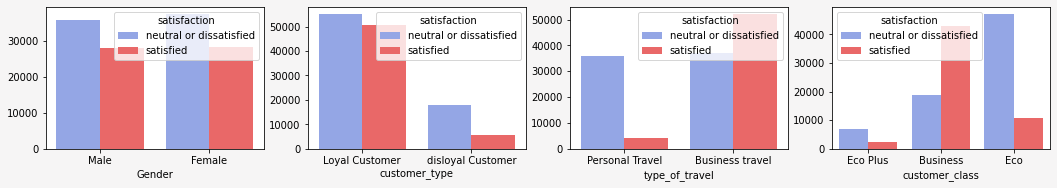

In [ ]:
# 2.1.2 視覺化類別變數數量
# 在類別變數中，滿意和不滿意分別人數

fig = plt.figure(figsize=(18,12), facecolor = '#f6f5f5')
palette = ['#869ef3','#ff5252']

axes = plt.subplot2grid((4, 4),(0, 0))
sns.countplot(data = df, x = 'Gender', hue = 'satisfaction', palette = ['#869ef3','#ff5252'])
plt.ylabel('')

axes = plt.subplot2grid((4, 4),(0, 1))
sns.countplot(data = df, x = 'customer_type', hue = 'satisfaction', palette = palette)
plt.ylabel('')

axes = plt.subplot2grid((4, 4),(0, 2))
sns.countplot(data = df, x = 'type_of_travel', hue = 'satisfaction', palette = palette)
plt.ylabel('')

axes = plt.subplot2grid((4, 4),(0, 3))
sns.countplot(data = df, x = 'customer_class', hue = 'satisfaction', palette = palette)
plt.ylabel('')

In [ ]:
# 2.2 統計數值變數的平均值和變異數
int_columns = df.select_dtypes(include=["int64", "float64"]).columns
Mean = []
Std = []
for column in int_columns:
    value = df.describe()[column][["mean", "std"]]
    value = round(value,2)
    Mean.append(value[0])
    Std.append(value[1])

IntData = pd.DataFrame({'Variable':[ _ for _ in int_columns],
                        'Mean': Mean,
                        "Std":Std,})
IntData


,Variable,Mean,Std
0,age,39.43,15.12
1,flight_distance,1190.21,997.56
2,inflight_wifi_service,2.73,1.33
3,departure_arrival_time_convenient,3.06,1.53
4,ease_of_online_booking,2.76,1.40
5,gate_location,2.98,1.28
6,food_and_drink,3.20,1.33
7,online_boarding,3.25,1.35
8,seat_comfort,3.44,1.32
9,inflight_entertainment,3.36,1.33


# 3. 資料前處理

In [ ]:
# 3.1 將類別變數進行 one-hot encoding
dummied_df = pd.get_dummies(df, columns = [_ for _ in df.select_dtypes(include=["object"]).columns])
dummied_df.info()

,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,...,Gender_Male,customer_type_Loyal Customer,customer_type_disloyal Customer,type_of_travel_Business travel,type_of_travel_Personal Travel,customer_class_Business,customer_class_Eco,customer_class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,13,460,3,4,3,1,5,3,5,5,...,1,1,0,0,1,0,0,1,1,0
1,25,235,3,2,3,3,1,3,1,1,...,1,0,1,1,0,1,0,0,1,0
2,26,1142,2,2,2,2,5,5,5,5,...,0,1,0,1,0,1,0,0,0,1
3,25,562,2,5,5,5,2,2,2,2,...,0,1,0,1,0,1,0,0,1,0
4,61,214,3,3,3,3,4,5,5,3,...,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,34,526,3,3,3,1,4,3,4,4,...,1,0,1,1,0,1,0,0,1,0
129876,23,646,4,4,4,4,4,4,4,4,...,1,1,0,1,0,1,0,0,0,1
129877,17,828,2,5,1,5,2,1,2,2,...,0,1,0,0,1,0,1,0,1,0
129878,14,1127,3,3,3,3,4,4,4,4,...,1,1,0,1,0,1,0,0,0,1


In [ ]:
# 3.2.1 為了避免模型學到不必要的資訊，使用相關性分析刪除不必要的變數
corr =dummied_df[dummied_df.columns[1:]].corr()['satisfaction_satisfied'][:-1]
corr

flight_distance                         0.298206
inflight_wifi_service                   0.283291
departure_arrival_time_convenient      -0.054457
ease_of_online_booking                  0.168704
gate_location                          -0.002923
food_and_drink                          0.211164
online_boarding                         0.501620
seat_comfort                            0.348576
inflight_entertainment                  0.398334
onboard_service                         0.322329
leg_room_service                        0.312557
baggage_handling                        0.248651
checkin_service                         0.237146
inflight_service                        0.245027
cleanliness                             0.306891
departure_delay_in_minutes             -0.051032
arrival_delay_in_minutes               -0.058275
Gender_Female                          -0.011496
Gender_Male                             0.011496
customer_type_Loyal Customer            0.185925
customer_type_disloy

<AxesSubplot:>

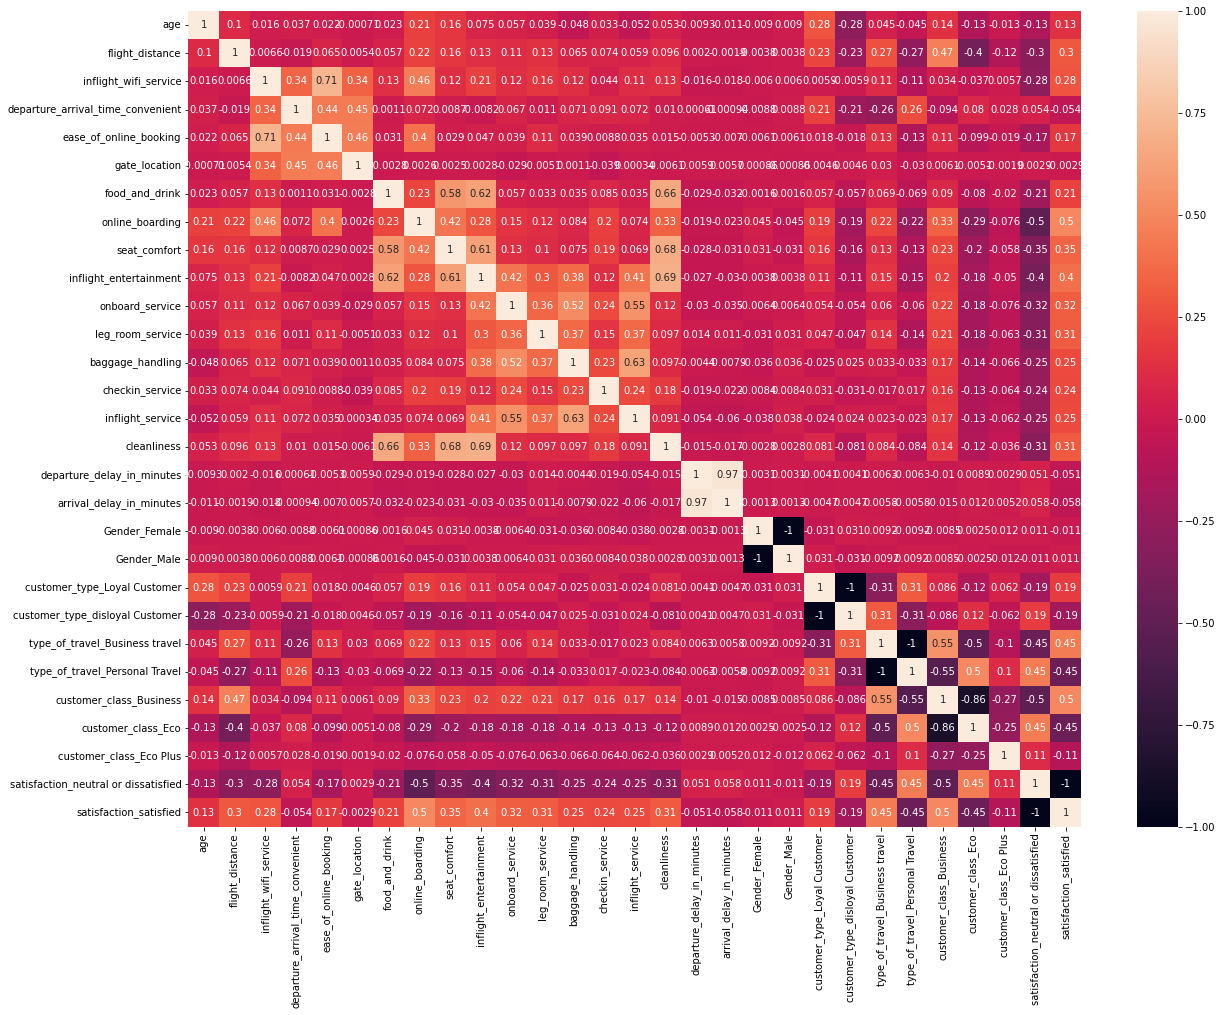

In [34]:
# 3.2.2 以熱力圖視覺化相關性分析
plt.figure(figsize=(20, 15))
sns.heatmap(dummied_df.corr(), annot = True)

In [35]:
# 3.2.3 刪除相關性分數小於 0.06 或 大於 -0.06 的 column
names = []
for i, r in corr.items():
    if  ((r < 0.06) & (r > -0.06)):
        names.append(i)

new_dummied_df = dummied_df.drop(columns = dummied_df[names])
new_dummied_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                Non-Null Count   Dtype
---  ------                                --------------   -----
 0   age                                   129487 non-null  int64
 1   flight_distance                       129487 non-null  int64
 2   inflight_wifi_service                 129487 non-null  int64
 3   ease_of_online_booking                129487 non-null  int64
 4   food_and_drink                        129487 non-null  int64
 5   online_boarding                       129487 non-null  int64
 6   seat_comfort                          129487 non-null  int64
 7   inflight_entertainment                129487 non-null  int64
 8   onboard_service                       129487 non-null  int64
 9   leg_room_service                      129487 non-null  int64
 10  baggage_handling                      129487 non-null  int64
 11  checkin_service           

In [36]:
# 3.3 刪除冗餘的欄位 (二元類別變數)
new_dummied_df = new_dummied_df.drop(['customer_type_disloyal Customer','type_of_travel_Personal Travel','satisfaction_neutral or dissatisfied'],axis=1)
new_dummied_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   age                             129487 non-null  int64
 1   flight_distance                 129487 non-null  int64
 2   inflight_wifi_service           129487 non-null  int64
 3   ease_of_online_booking          129487 non-null  int64
 4   food_and_drink                  129487 non-null  int64
 5   online_boarding                 129487 non-null  int64
 6   seat_comfort                    129487 non-null  int64
 7   inflight_entertainment          129487 non-null  int64
 8   onboard_service                 129487 non-null  int64
 9   leg_room_service                129487 non-null  int64
 10  baggage_handling                129487 non-null  int64
 11  checkin_service                 129487 non-null  int64
 12  inflight_service                129487 non-n

In [37]:
# 3.4 處理完後，匯出誠心資料集，方便日後使用
new_dummied_df.to_csv("new_airline_passenger_satisfaction.csv",index=False, header=True)
print('Export complete...')

Export complete...
